**Importing packages and data**

In [1]:
import pandas as pd    # importing appropriate packsges 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import requests
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import plotly as py
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
from dmba import classificationSummary, gainsChart, liftChart
import lxml
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
from mord import LogisticIT
from dmba.metric import AIC_score
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
stats = pd.read_excel("/Users/thoma/Downloads/Stats.xlsx")   # retrieving the player stats data 

**Data Exploration**

In [3]:
stats.head()   # The first couple rows of the data set 

,Rk,Name,Born,Pos,GP,G,A,P,PIM,+/-,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,1,Sidney Crosby,1987,F,1139,534,915,1449,747,206,...,0.469,0.803,1.272,3632,14.7%,976,554,12 932,11 879,52.12%
1,2,Alexander Ovechkin,1985,F,1308,800,646,1446,765,76,...,0.612,0.494,1.106,6205,12.9%,3376,512,62,120,34.07%
2,3,Patrick Kane,1988,F,1137,434,768,1202,418,21,...,0.382,0.675,1.057,3788,11.5%,295,249,323,509,38.82%
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,1028,62,...,0.449,0.715,1.164,3340,13.6%,613,408,5069,6332,44.46%
4,5,Anze Kopitar,1987,F,1244,375,720,1095,322,67,...,0.301,0.579,0.880,2996,12.5%,1161,855,12 239,10 861,52.98%


In [4]:
stats.tail()   # The last couple rows of the data set 

,Rk,Name,Born,Pos,GP,G,A,P,PIM,+/-,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
245,246,Sean Kuraly,1993,F,376,45,63,108,221,-21,...,0.120,0.168,0.287,630,0.071,841,186,1966,1940,0.5033
246,247,Austin Watson,1992,F,438,51,56,107,525,-4,...,0.116,0.128,0.244,519,0.098,1034,400,99,124,0.4439
247,248,Garnet Hathaway,1991,F,407,48,59,107,456,52,...,0.118,0.145,0.263,479,0.1,1196,274,51,86,0.3723
248,249,Oscar Sundqvist,1994,F,312,45,62,107,133,-8,...,0.144,0.199,0.343,402,0.112,379,143,767,986,0.4375
249,250,Trevor Moore,1995,F,238,42,65,107,52,7,...,0.176,0.273,0.450,486,0.086,217,78,41,72,0.3628


In [5]:
stats.info()   # General info for the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      250 non-null    int64  
 1   Name    250 non-null    object 
 2   Born    250 non-null    int64  
 3   Pos     250 non-null    object 
 4   GP      250 non-null    int64  
 5   G       250 non-null    int64  
 6   A       250 non-null    int64  
 7   P       250 non-null    int64  
 8   PIM     250 non-null    int64  
 9   +/-     250 non-null    int64  
 10  TOI     250 non-null    object 
 11  ES      250 non-null    object 
 12  PP      250 non-null    object 
 13  SH      250 non-null    object 
 14  ESG     250 non-null    int64  
 15  PPG     250 non-null    int64  
 16  SHG     250 non-null    int64  
 17  GWG     250 non-null    int64  
 18  OTG     250 non-null    int64  
 19  ESA     250 non-null    int64  
 20  PPA     250 non-null    int64  
 21  SHA     250 non-null    int64  
 22  GW

In [6]:
stats.describe()   # General statistical info for the data 

,Rk,Born,GP,G,A,P,PIM,+/-,ESG,PPG,...,ESP/60,PPG/60,PPA/60,PPP/60,G/GP,A/GP,P/GP,SHOTS,HITS,BS
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,1992.732000,590.740000,158.104000,215.876000,373.980000,280.324000,12.492000,116.124000,37.776000,...,1.963472,1.624596,2.398396,4.022956,0.261332,0.352636,0.613964,1323.360000,654.396000,275.916000
std,72.312977,3.679447,263.658582,107.192453,153.215484,253.187098,236.601276,60.041836,70.186074,37.860527,...,0.411470,0.638877,1.030254,1.316818,0.097757,0.143134,0.224839,847.223971,567.562242,162.392371
min,1.000000,1984.000000,160.000000,37.000000,56.000000,107.000000,24.000000,-159.000000,28.000000,0.000000,...,1.010000,0.000000,0.000000,0.000000,0.069000,0.081000,0.150000,351.000000,26.000000,41.000000
25%,63.250000,1990.000000,397.500000,75.000000,98.250000,179.750000,116.000000,-26.500000,62.000000,11.000000,...,1.694500,1.210750,1.681500,3.060750,0.190250,0.245250,0.449250,721.000000,281.250000,160.750000
50%,125.500000,1993.000000,548.000000,129.500000,169.000000,295.500000,208.500000,9.000000,100.500000,25.500000,...,1.965000,1.559500,2.302500,4.004500,0.255000,0.333500,0.604500,1092.500000,502.500000,238.500000
75%,187.750000,1995.750000,733.500000,205.500000,280.000000,494.000000,368.500000,48.750000,146.750000,53.750000,...,2.188750,1.996500,3.034500,4.874750,0.322000,0.439000,0.738250,1651.500000,837.500000,353.000000
max,250.000000,2002.000000,1319.000000,800.000000,915.000000,1449.000000,1312.000000,271.000000,503.000000,292.000000,...,3.264000,4.007000,6.244000,8.325000,0.626000,0.950000,1.463000,6205.000000,3660.000000,1029.000000


In [7]:
stats.dtypes   # Datatypes for each variable in the data 

Rk          int64
Name       object
Born        int64
Pos        object
GP          int64
G           int64
A           int64
P           int64
PIM         int64
+/-         int64
TOI        object
ES         object
PP         object
SH         object
ESG         int64
PPG         int64
SHG         int64
GWG         int64
OTG         int64
ESA         int64
PPA         int64
SHA         int64
GWA         int64
OTA         int64
ESP         int64
PPP         int64
SHP         int64
GWP         int64
OTP         int64
PPP%       object
G/60      float64
A/60      float64
P/60      float64
ESG/60    float64
ESA/60    float64
ESP/60    float64
PPG/60    float64
PPA/60    float64
PPP/60    float64
G/GP      float64
A/GP      float64
P/GP      float64
SHOTS       int64
SH%        object
HITS        int64
BS          int64
FOW        object
FOL        object
FO%        object
dtype: object

In [8]:
stats.shape   # Overall shape of the entire set (total rows and columns)

(250, 49)

In [9]:
stats.isna().sum()   # Number of null values in the data set for each column 

Rk        0
Name      0
Born      0
Pos       0
GP        0
G         0
A         0
P         0
PIM       0
+/-       0
TOI       0
ES        0
PP        0
SH        0
ESG       0
PPG       0
SHG       0
GWG       0
OTG       0
ESA       0
PPA       0
SHA       0
GWA       0
OTA       0
ESP       0
PPP       0
SHP       0
GWP       0
OTP       0
PPP%      0
G/60      0
A/60      0
P/60      0
ESG/60    0
ESA/60    0
ESP/60    0
PPG/60    0
PPA/60    0
PPP/60    0
G/GP      0
A/GP      0
P/GP      0
SHOTS     0
SH%       0
HITS      0
BS        0
FOW       0
FOL       0
FO%       0
dtype: int64

In [10]:
stats.corr()   # Correlation between the categories 

,Rk,Born,GP,G,A,P,PIM,+/-,ESG,PPG,...,ESP/60,PPG/60,PPA/60,PPP/60,G/GP,A/GP,P/GP,SHOTS,HITS,BS
Rk,1.000000,0.523253,-0.784130,-0.863920,-0.887803,-0.903011,-0.428591,-0.339262,-0.871562,-0.793644,...,-0.548061,-0.349768,-0.494120,-0.556279,-0.588221,-0.661013,-0.676607,-0.840394,-0.206659,-0.551002
Born,0.523253,1.000000,-0.845450,-0.582490,-0.561669,-0.586502,-0.596957,-0.215728,-0.605875,-0.473432,...,0.153625,0.028194,0.091851,0.085546,0.069708,0.052225,0.063607,-0.649091,-0.537420,-0.696646
GP,-0.784130,-0.845450,1.000000,0.801348,0.796408,0.821213,0.672398,0.193646,0.822685,0.688443,...,0.041731,0.065760,0.122047,0.127372,0.145418,0.200973,0.191109,0.860488,0.553357,0.760066
G,-0.863920,-0.582490,0.801348,1.000000,0.887095,0.960196,0.513062,0.343303,0.989616,0.956005,...,0.494729,0.418906,0.343885,0.472284,0.650406,0.537715,0.625104,0.962418,0.314151,0.577043
A,-0.887803,-0.561669,0.796408,0.887095,1.000000,0.980719,0.460317,0.376316,0.887067,0.830812,...,0.522990,0.242737,0.548372,0.546787,0.506989,0.707437,0.670778,0.868561,0.193804,0.566865
P,-0.903011,-0.586502,0.821213,0.960196,0.980719,1.000000,0.495776,0.373072,0.955783,0.907510,...,0.525940,0.324245,0.477437,0.530839,0.582167,0.655757,0.670571,0.933068,0.250283,0.587341
PIM,-0.428591,-0.596957,0.672398,0.513062,0.460317,0.495776,1.000000,0.119245,0.534380,0.434047,...,-0.037778,0.027635,-0.058747,-0.032551,0.048488,0.024700,0.036837,0.550079,0.735091,0.409075
+/-,-0.339262,-0.215728,0.193646,0.343303,0.376316,0.373072,0.119245,1.000000,0.346422,0.287303,...,0.459093,0.166839,0.287696,0.306036,0.328633,0.385505,0.388390,0.257331,0.069513,0.247792
ESG,-0.871562,-0.605875,0.822685,0.989616,0.887067,0.955783,0.534380,0.346422,1.000000,0.907812,...,0.488364,0.352660,0.330482,0.429654,0.621080,0.516539,0.598859,0.962116,0.326741,0.580327
PPG,-0.793644,-0.473432,0.688443,0.956005,0.830812,0.907510,0.434047,0.287303,0.907812,1.000000,...,0.505708,0.532769,0.361861,0.541599,0.690613,0.567213,0.661382,0.897545,0.250244,0.492451


**Data Handling, Cleaning & Manipulation**

In [11]:
stats.drop(columns = ['PIM', 'ES', 'PP', 'SH', 'PPP%', 'SH%', 'FOW', 'FOL', 'FO%'], inplace = True)  # Dropping unnecessary columns

In [12]:
stats.drop(columns = ['ESG/60', 'ESA/60', 'ESP/60', 'PPG/60', 'PPA/60', 'PPP/60'], inplace = True)   # Dropping unimportant columns

In [13]:
stats.head(5)   # New shape showing the total of 34 columns

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,OTP,G/60,A/60,P/60,G/GP,A/GP,P/GP,SHOTS,HITS,BS
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,38,1.356,2.323,3.678,0.469,0.803,1.272,3632,976,554
1,2,Alexander Ovechkin,1985,F,1308,800,646,1446,76,20:51,...,38,1.760,1.421,3.181,0.612,0.494,1.106,6205,3376,512
2,3,Patrick Kane,1988,F,1137,434,768,1202,21,20:18,...,35,1.127,1.995,3.123,0.382,0.675,1.057,3788,295,249
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,33,1.360,2.169,3.529,0.449,0.715,1.164,3340,613,408
4,5,Anze Kopitar,1987,F,1244,375,720,1095,67,21:00,...,30,0.861,1.653,2.515,0.301,0.579,0.880,2996,1161,855


In [14]:
stats.columns   # List of the columns in new dataframe

Index(['Rk', 'Name', 'Born', 'Pos', 'GP', 'G', 'A', 'P', '+/-', 'TOI', 'ESG',
       'PPG', 'SHG', 'GWG', 'OTG', 'ESA', 'PPA', 'SHA', 'GWA', 'OTA', 'ESP',
       'PPP', 'SHP', 'GWP', 'OTP', 'G/60', 'A/60', 'P/60', 'G/GP', 'A/GP',
       'P/GP', 'SHOTS', 'HITS', 'BS'],
      dtype='object')

In [15]:
stats['P/S'] = stats['P'] / stats['GP'] * 82  # Creating new column for average points per season if full 82 games are played

In [16]:
stats.head(5)

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,G/60,A/60,P/60,G/GP,A/GP,P/GP,SHOTS,HITS,BS,P/S
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,1.356,2.323,3.678,0.469,0.803,1.272,3632,976,554,104.317823
1,2,Alexander Ovechkin,1985,F,1308,800,646,1446,76,20:51,...,1.760,1.421,3.181,0.612,0.494,1.106,6205,3376,512,90.651376
2,3,Patrick Kane,1988,F,1137,434,768,1202,21,20:18,...,1.127,1.995,3.123,0.382,0.675,1.057,3788,295,249,86.687775
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,1.360,2.169,3.529,0.449,0.715,1.164,3340,613,408,95.450593
4,5,Anze Kopitar,1987,F,1244,375,720,1095,67,21:00,...,0.861,1.653,2.515,0.301,0.579,0.880,2996,1161,855,72.178457


In [17]:
stats['CP10'] = stats['P/S'] * 10  # New column for career points for 10 seasons played at average points per season

In [18]:
stats['CP12'] = stats['P/S'] * 12  # New column for career points for 12 seasons played at average points per season

In [19]:
stats['CP15'] = stats['P/S'] * 15  # New column for career points for 15 seasons played at average points per season

In [20]:
stats.head(5)

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,HITS,BS,P/S,CP10,CP12,CP15
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,0.469,0.803,1.272,3632,976,554,104.317823,1043.178227,1251.813872,1564.767340
1,2,Alexander Ovechkin,1985,F,1308,800,646,1446,76,20:51,...,0.612,0.494,1.106,6205,3376,512,90.651376,906.513761,1087.816514,1359.770642
2,3,Patrick Kane,1988,F,1137,434,768,1202,21,20:18,...,0.382,0.675,1.057,3788,295,249,86.687775,866.877748,1040.253298,1300.316623
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,0.449,0.715,1.164,3340,613,408,95.450593,954.505929,1145.407115,1431.758893
4,5,Anze Kopitar,1987,F,1244,375,720,1095,67,21:00,...,0.301,0.579,0.880,2996,1161,855,72.178457,721.784566,866.141479,1082.676849


In [21]:
stats.sort_values(by = 'CP10', ascending = False)  # Sorting the data by highest point totals at 10 years given 82 game average

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,HITS,BS,P/S,CP10,CP12,CP15
21,22,Connor McDavid,1997,F,520,267,494,761,95,21:43,...,0.513,0.950,1.463,1728,314,199,120.003846,1200.038462,1440.046154,1800.057692
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,0.469,0.803,1.272,3632,976,554,104.317823,1043.178227,1251.813872,1564.767340
169,170,Kirill Kaprizov,1997,F,167,93,108,201,34,19:08:00,...,0.557,0.647,1.204,574,127,61,98.694611,986.946108,1184.335329,1480.419162
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,0.449,0.715,1.164,3340,613,408,95.450593,954.505929,1145.407115,1431.758893
29,30,Leon Draisaitl,1995,F,591,275,395,670,24,20:23,...,0.465,0.668,1.134,1549,331,189,92.961083,929.610829,1115.532995,1394.416244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,Luke Glendening,1989,F,669,68,78,146,-68,14:16:00,...,0.102,0.117,0.218,801,1305,643,17.895366,178.953662,214.744395,268.430493
232,233,Pierre-Edouard Bellemare,1985,F,615,57,64,121,25,12:50:00,...,0.093,0.104,0.197,736,563,456,16.133333,161.333333,193.600000,242.000000
217,218,Kyle Clifford,1991,F,753,66,78,144,-22,10:10:00,...,0.088,0.104,0.191,996,1618,152,15.681275,156.812749,188.175299,235.219124
206,207,Matthew Martin,1989,F,849,73,85,158,-44,10:53:00,...,0.086,0.100,0.186,943,3517,384,15.260306,152.603062,183.123675,228.904594


In [22]:
stats.sort_values(by = 'CP12', ascending = False)  # Same as above for 12 years

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,HITS,BS,P/S,CP10,CP12,CP15
21,22,Connor McDavid,1997,F,520,267,494,761,95,21:43,...,0.513,0.950,1.463,1728,314,199,120.003846,1200.038462,1440.046154,1800.057692
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,0.469,0.803,1.272,3632,976,554,104.317823,1043.178227,1251.813872,1564.767340
169,170,Kirill Kaprizov,1997,F,167,93,108,201,34,19:08:00,...,0.557,0.647,1.204,574,127,61,98.694611,986.946108,1184.335329,1480.419162
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,0.449,0.715,1.164,3340,613,408,95.450593,954.505929,1145.407115,1431.758893
29,30,Leon Draisaitl,1995,F,591,275,395,670,24,20:23,...,0.465,0.668,1.134,1549,331,189,92.961083,929.610829,1115.532995,1394.416244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,Luke Glendening,1989,F,669,68,78,146,-68,14:16:00,...,0.102,0.117,0.218,801,1305,643,17.895366,178.953662,214.744395,268.430493
232,233,Pierre-Edouard Bellemare,1985,F,615,57,64,121,25,12:50:00,...,0.093,0.104,0.197,736,563,456,16.133333,161.333333,193.600000,242.000000
217,218,Kyle Clifford,1991,F,753,66,78,144,-22,10:10:00,...,0.088,0.104,0.191,996,1618,152,15.681275,156.812749,188.175299,235.219124
206,207,Matthew Martin,1989,F,849,73,85,158,-44,10:53:00,...,0.086,0.100,0.186,943,3517,384,15.260306,152.603062,183.123675,228.904594


In [23]:
stats.sort_values(by = 'CP15', ascending = False)  # Same as above for 15 years 

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,HITS,BS,P/S,CP10,CP12,CP15
21,22,Connor McDavid,1997,F,520,267,494,761,95,21:43,...,0.513,0.950,1.463,1728,314,199,120.003846,1200.038462,1440.046154,1800.057692
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,0.469,0.803,1.272,3632,976,554,104.317823,1043.178227,1251.813872,1564.767340
169,170,Kirill Kaprizov,1997,F,167,93,108,201,34,19:08:00,...,0.557,0.647,1.204,574,127,61,98.694611,986.946108,1184.335329,1480.419162
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,0.449,0.715,1.164,3340,613,408,95.450593,954.505929,1145.407115,1431.758893
29,30,Leon Draisaitl,1995,F,591,275,395,670,24,20:23,...,0.465,0.668,1.134,1549,331,189,92.961083,929.610829,1115.532995,1394.416244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,Luke Glendening,1989,F,669,68,78,146,-68,14:16:00,...,0.102,0.117,0.218,801,1305,643,17.895366,178.953662,214.744395,268.430493
232,233,Pierre-Edouard Bellemare,1985,F,615,57,64,121,25,12:50:00,...,0.093,0.104,0.197,736,563,456,16.133333,161.333333,193.600000,242.000000
217,218,Kyle Clifford,1991,F,753,66,78,144,-22,10:10:00,...,0.088,0.104,0.191,996,1618,152,15.681275,156.812749,188.175299,235.219124
206,207,Matthew Martin,1989,F,849,73,85,158,-44,10:53:00,...,0.086,0.100,0.186,943,3517,384,15.260306,152.603062,183.123675,228.904594


In [24]:
stats.sort_values(by = 'P', ascending = False)  # Showing active point leaders 

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,G/GP,A/GP,P/GP,SHOTS,HITS,BS,P/S,CP10,CP12,CP15
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,0.469,0.803,1.272,3632,976,554,104.317823,1043.178227,1251.813872,1564.767340
1,2,Alexander Ovechkin,1985,F,1308,800,646,1446,76,20:51,...,0.612,0.494,1.106,6205,3376,512,90.651376,906.513761,1087.816514,1359.770642
2,3,Patrick Kane,1988,F,1137,434,768,1202,21,20:18,...,0.382,0.675,1.057,3788,295,249,86.687775,866.877748,1040.253298,1300.316623
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,0.449,0.715,1.164,3340,613,408,95.450593,954.505929,1145.407115,1431.758893
4,5,Anze Kopitar,1987,F,1244,375,720,1095,67,21:00,...,0.301,0.579,0.880,2996,1161,855,72.178457,721.784566,866.141479,1082.676849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Sean Kuraly,1993,F,376,45,63,108,-21,13:45:00,...,0.120,0.168,0.287,630,841,186,23.553191,235.531915,282.638298,353.297872
246,247,Austin Watson,1992,F,438,51,56,107,-4,11:54:00,...,0.116,0.128,0.244,519,1034,400,20.031963,200.319635,240.383562,300.479452
247,248,Garnet Hathaway,1991,F,407,48,59,107,52,11:35:00,...,0.118,0.145,0.263,479,1196,274,21.557740,215.577396,258.692875,323.366093
248,249,Oscar Sundqvist,1994,F,312,45,62,107,-8,13:27:00,...,0.144,0.199,0.343,402,379,143,28.121795,281.217949,337.461538,421.826923


In [25]:
stats.groupby('Born')['P'].agg(['mean', 'var', 'std'])  # Grouping the data by age of player and getting average points

,mean,var,std
Born,,,
1984,952.333333,8105.333333,90.029625
1985,845.833333,182938.166667,427.712715
1986,730.000000,134626.500000,366.914840
1987,605.090909,165291.490909,406.560562
1988,677.181818,72685.563636,269.602603
1989,466.133333,38833.838095,197.063031
1990,472.714286,63127.450549,251.251767
1991,369.041667,38123.085145,195.251338
1992,352.640000,21858.656667,147.846734


**Building Models & Data Visualizations**

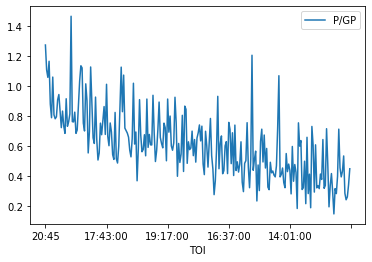

In [26]:
stats.plot.line(x = 'TOI', y = 'P/GP')   # Showing relationship between Time on Ice and Points per game in descending format
plt.show()

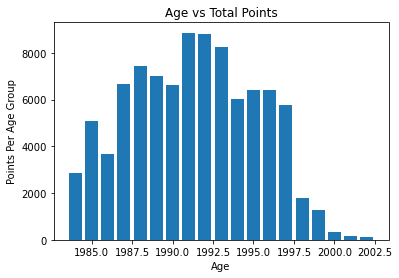

In [27]:
stats_bar= stats[['Born', 'P']]
stats_ed =stats_bar.groupby(['Born'])['P'].sum().reset_index()
plt.bar(stats_ed.Born, stats_ed.P)
plt.title('Age vs Total Points')
plt.xlabel('Age')
plt.ylabel('Points Per Age Group')

plt.show()     # Showing a visualization of the total point accumulations by each age class expressed as year born

<AxesSubplot:>

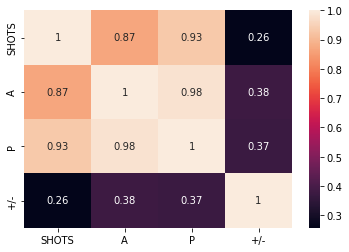

In [28]:
stats_corr = stats[['SHOTS', 'A', 'P', '+/-']]

sns.heatmap(stats_corr.corr(), annot = True)   # Expressing the correlation between shots and production output

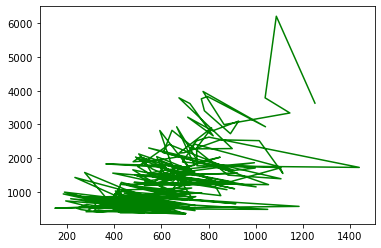

In [29]:
plt.plot(stats.CP12, stats.SHOTS, color = 'Green')   # Line graph for 12 year point totals versus shots 

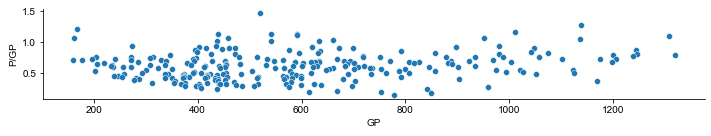

In [30]:
sns.relplot(x='GP', y='P/GP', data=stats, height=2, aspect=5, kind='scatter')
sns.set_style('dark')    # Showing the connection between points per game and total games played 

C:\Users\thoma\AppData\Local\Temp\ipykernel_19600\4031533103.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stats.dpt =stats_pie.groupby(['GP'])['Born'].sum().reset_index()


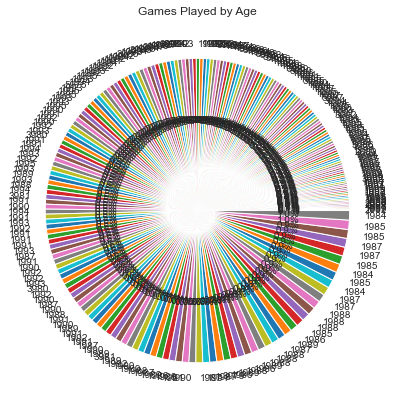

,GP,Born
0,160,2002
1,161,1999
2,167,1997
3,176,1998
4,197,2001


In [31]:
stats_pie= stats[['GP', 'Born']]

stats.dpt =stats_pie.groupby(['GP'])['Born'].sum().reset_index()
fig = plt.figure(figsize =(10, 7))

plt.pie(stats.dpt.GP, labels = stats.dpt.Born,  autopct= '%1.1f%%')
plt.title('Games Played by Age')

# show plot
plt.show()




stats.dpt.head()     # Graph for games played by age 

In [32]:
stats['HOF'] = np.where(stats['CP12']>=850, 'Yes', 'No')  # New column for if a player will be a Hall of Famer

In [33]:
stats.head(5)

,Rk,Name,Born,Pos,GP,G,A,P,+/-,TOI,...,A/GP,P/GP,SHOTS,HITS,BS,P/S,CP10,CP12,CP15,HOF
0,1,Sidney Crosby,1987,F,1139,534,915,1449,206,20:45,...,0.803,1.272,3632,976,554,104.317823,1043.178227,1251.813872,1564.767340,Yes
1,2,Alexander Ovechkin,1985,F,1308,800,646,1446,76,20:51,...,0.494,1.106,6205,3376,512,90.651376,906.513761,1087.816514,1359.770642,Yes
2,3,Patrick Kane,1988,F,1137,434,768,1202,21,20:18,...,0.675,1.057,3788,295,249,86.687775,866.877748,1040.253298,1300.316623,Yes
3,4,Evgeni Malkin,1986,F,1012,454,724,1178,62,19:47,...,0.715,1.164,3340,613,408,95.450593,954.505929,1145.407115,1431.758893,Yes
4,5,Anze Kopitar,1987,F,1244,375,720,1095,67,21:00,...,0.579,0.880,2996,1161,855,72.178457,721.784566,866.141479,1082.676849,Yes


In [34]:
stats['HOF'].iloc[[20, 35, 50]]   # testing if random ranks qualify for Hall of Fame

20     No
35     No
50    Yes
Name: HOF, dtype: object

In [35]:
stats['HOF'].iloc[[28, 67, 82]]   # Same as above 

28    Yes
67     No
82     No
Name: HOF, dtype: object

In [36]:
stats['HOF'].iloc[[32, 48, 102]]   # Same as above 

32     No
48     No
102    No
Name: HOF, dtype: object

In [37]:
stats['HOF'].value_counts()  # Showing how many players are projected to make the Hall of Fame 

No     217
Yes     33
Name: HOF, dtype: int64

In [38]:
stats['Superstar'] = np.where(stats['P/S'] >= 90, 'Yes', 'No')  # New Column for distinguishing most talented players

In [39]:
stats['Workhorse'] = np.where(stats['GP'] >= 1100, 'Yes', 'No')  # New column to distinguish most reliable players 

In [40]:
stats['Superstar'].value_counts()   # Active players who qualify as superstar quality

No     241
Yes      9
Name: Superstar, dtype: int64

In [41]:
stats['Workhorse'].value_counts()  # Active players who qualify as consistently reliable

No     235
Yes     15
Name: Workhorse, dtype: int64

**Multiple Regression Model**

In [42]:
predictors = ['G', 'A', 'P', '+/-', 'SHOTS', 'P/GP', 'P/S', 'GP']
outcome = 'CP12'   # Inputting the predictor variables and outcome 

In [43]:
X = pd.get_dummies(stats[predictors], drop_first = True)
X

,G,A,P,+/-,SHOTS,P/GP,P/S,GP
0,534,915,1449,206,3632,1.272,104.317823,1139
1,800,646,1446,76,6205,1.106,90.651376,1308
2,434,768,1202,21,3788,1.057,86.687775,1137
3,454,724,1178,62,3340,1.164,95.450593,1012
4,375,720,1095,67,2996,0.880,72.178457,1244
...,...,...,...,...,...,...,...,...
245,45,63,108,-21,630,0.287,23.553191,376
246,51,56,107,-4,519,0.244,20.031963,438
247,48,59,107,52,479,0.263,21.557740,407
248,45,62,107,-8,402,0.343,28.121795,312


In [44]:
y = stats[outcome]

In [45]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,random_state=1)  # splitting data into test and train sets 

In [46]:
stats_lm = LinearRegression()
stats_lm.fit(train_X, train_y)

print(pd.DataFrame({'Predictor': X.columns, 'coefficient': stats_lm.coef_}))  # Coefficients and performance measures

  Predictor   coefficient
0         G -1.874407e-13
1         A -1.858180e-13
2         P  1.860289e-13
3       +/-  2.969658e-16
4     SHOTS -6.720697e-17
5      P/GP -1.066811e-11
6       P/S  1.200000e+01
7        GP  7.630087e-16


In [47]:
stats_lm_pred = stats_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': stats_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - stats_lm_pred})
print(result.head(20))

      Predicted      Actual      Residual
67   676.322767  676.322767 -2.273737e-13
249  442.386555  442.386555  1.136868e-13
230  704.454545  704.454545  0.000000e+00
161  355.191710  355.191710 -5.684342e-14
91   562.085470  562.085470  0.000000e+00
224  313.191874  313.191874  0.000000e+00
58   508.317588  508.317588 -2.273737e-13
234  411.171429  411.171429  1.136868e-13
180  447.272727  447.272727 -5.684342e-14
4    866.141479  866.141479 -3.410605e-13
242  389.352518  389.352518  1.136868e-13
188  389.681416  389.681416  5.684342e-14
116  478.432511  478.432511 -5.684342e-14
182  322.821053  322.821053 -5.684342e-14
127  625.002198  625.002198  0.000000e+00
78   661.173502  661.173502 -2.273737e-13
184  485.404826  485.404826  0.000000e+00
51   655.197062  655.197062 -1.136868e-13
27   849.818182  849.818182 -1.136868e-13
73   604.066667  604.066667 -2.273737e-13


In [48]:
regressionSummary(valid_y, stats_lm_pred)  # Performance measures for validation set 


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : -0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000


In [49]:
# The above model was cut short because the outcome element was a previously calculated field therefore the next steps were forfeited

**Logistic Regression Model**

In [50]:
stats['HOF'] = stats['HOF'].astype('category')  # Treating HOF as categorical, converting to new values 
new_categories = {1: 'Yes', 2: 'No'}
stats.HOF.cat.rename_categories(new_categories, inplace=True)
stats = pd.get_dummies(stats, prefix_sep='_', drop_first=True)

C:\Users\thoma\AppData\Local\Temp\ipykernel_19600\405696475.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  stats.HOF.cat.rename_categories(new_categories, inplace=True)


In [ ]:
y = stats['CP12']
X = stats.drop(columns = ['CP12'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

In [ ]:
# I'm not entirely sure why this model wouldnt give me an ouput. Kept getting error message 

**Decesion Tree Model**

In [52]:
X = stats.drop(columns=['CP12'])
y = stats['P']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier(random_state=1) # Replace Classifier with Regressor for other output 
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [53]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
     0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

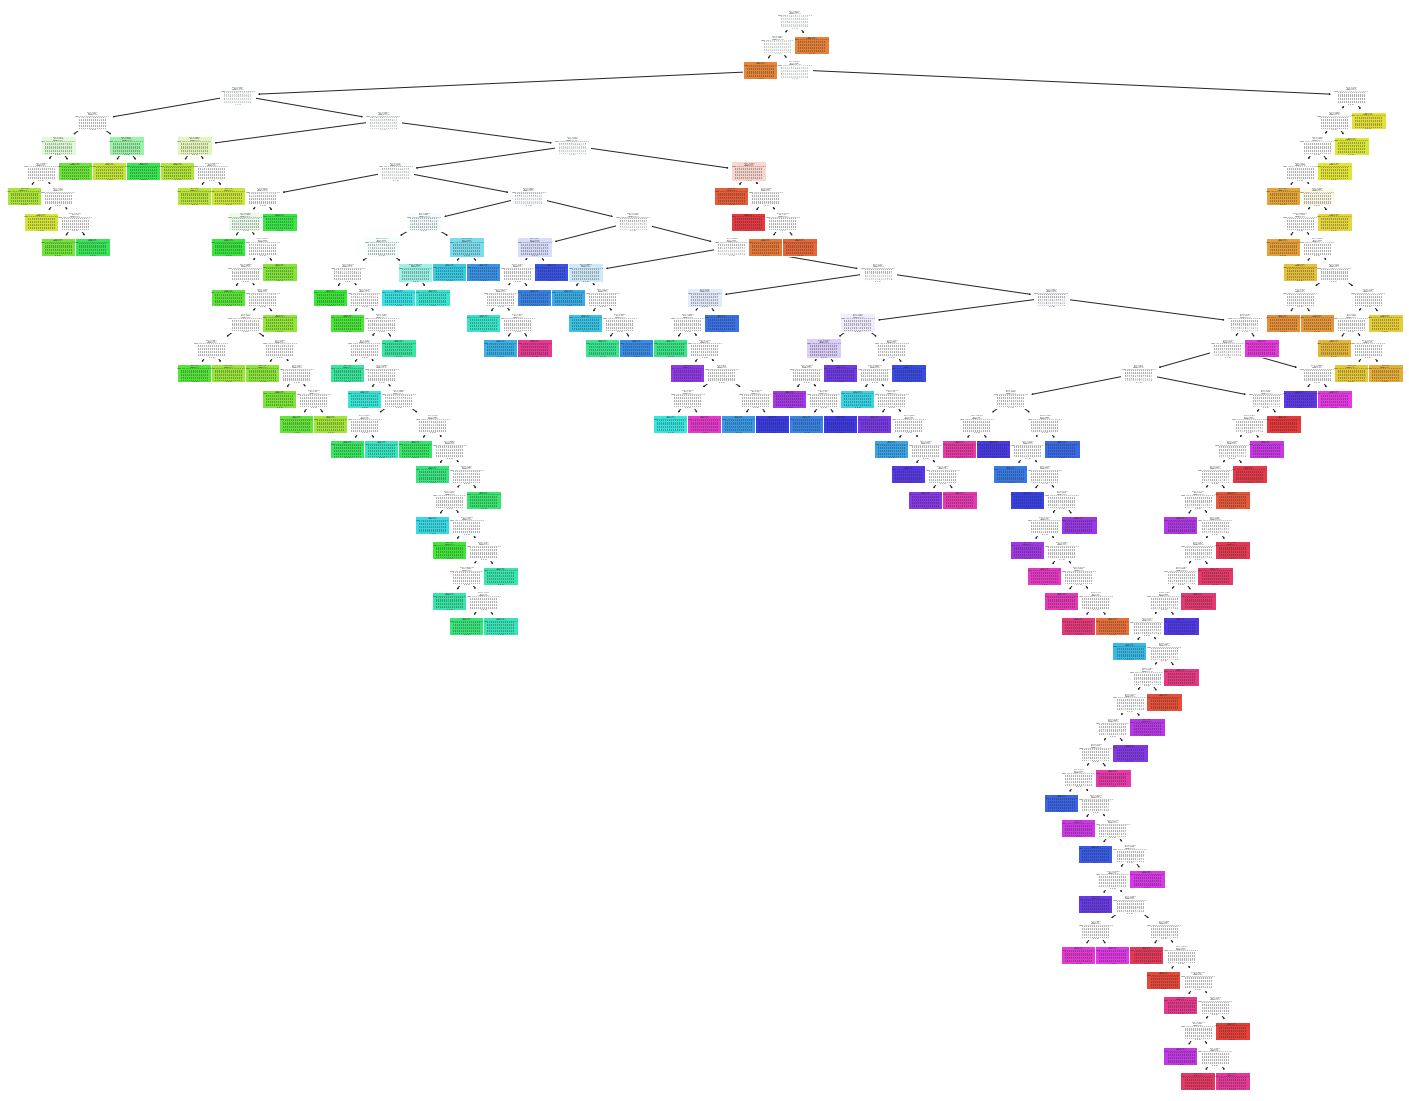

In [54]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(fullClassTree.fit(train_X, train_y), filled=True)

In [55]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20,
                        min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)

classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.0600)

       Prediction
Actual   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
     0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

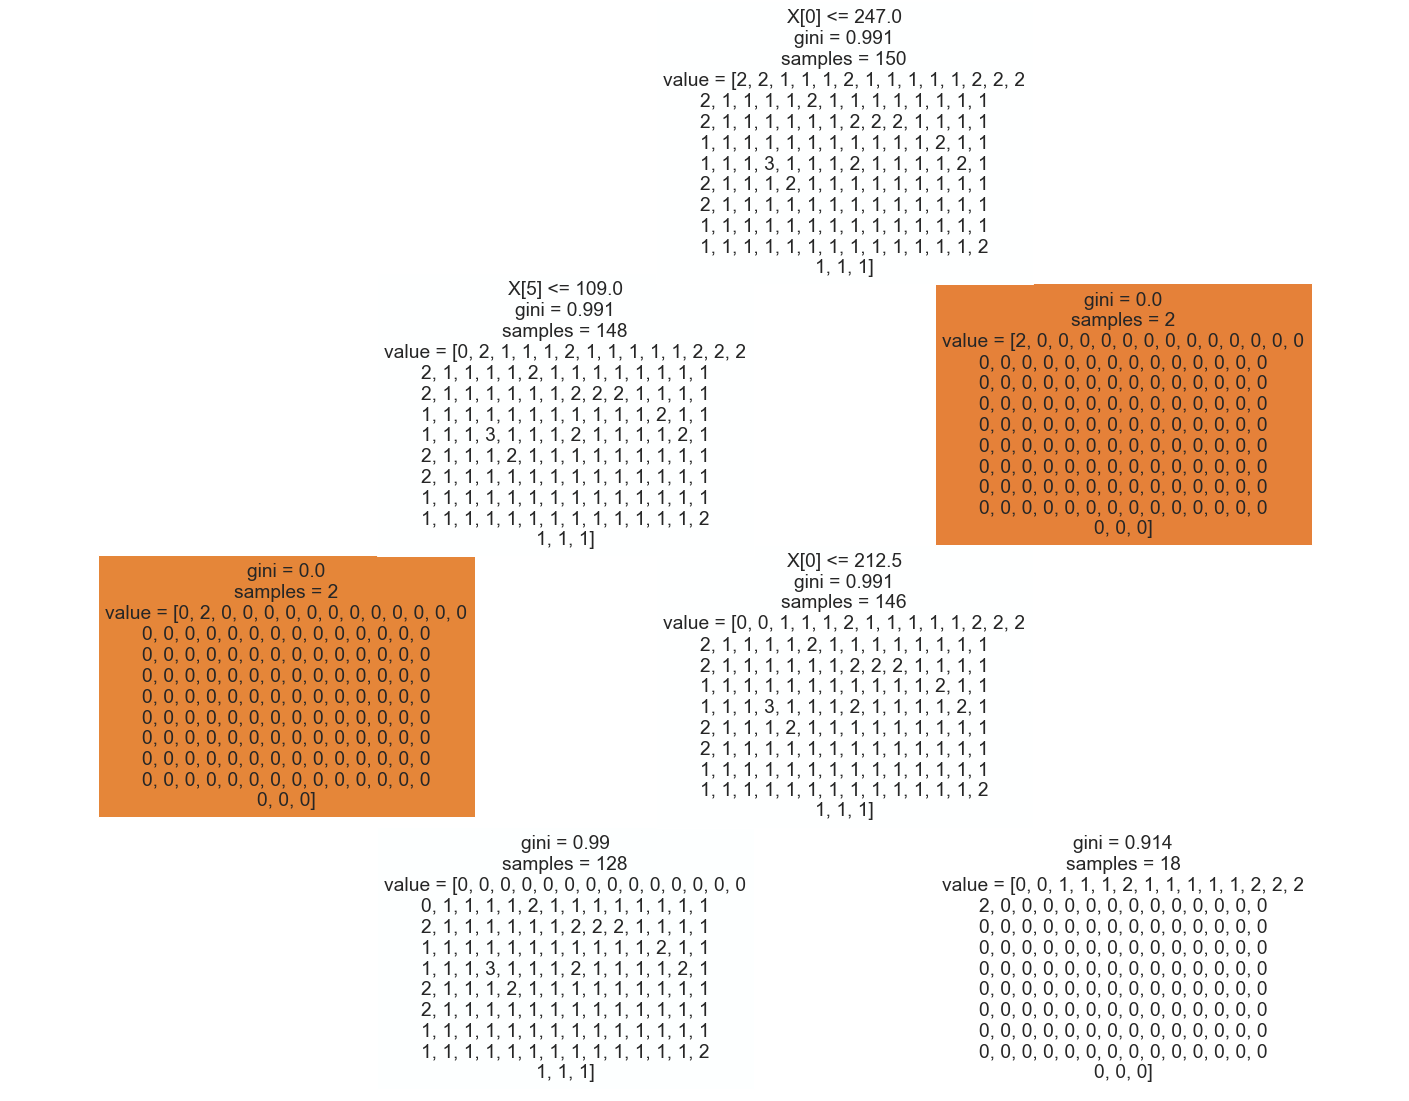

In [56]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(smallClassTree.fit(train_X, train_y), filled=True)

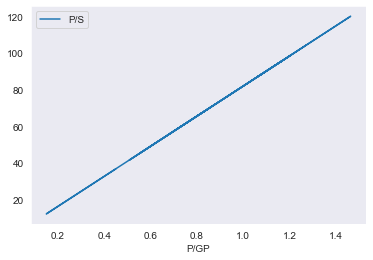

In [62]:
stats.plot.line(x="P/GP", y="P/S")

plt.show()    # Chart to show connection between points per game and points per season 